In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
PATH = '../../fastai/courses/dl1/data/dogscats/'
sz = 224

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.backends.cudnn.enabled

True

In [8]:
!ls {PATH}

models	sample	test1  tmp  train  valid


In [9]:
!ls {PATH}valid

cats  dogs


In [10]:
files = !ls {PATH}valid/cats | head
files

['cat.10016.jpg',
 'cat.1001.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

In [11]:
files = os.listdir(f'{PATH}valid/dogs')[:5]
files

['dog.2851.jpg',
 'dog.8500.jpg',
 'dog.7275.jpg',
 'dog.6665.jpg',
 'dog.1150.jpg']

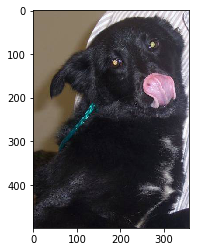

In [12]:
img = plt.imread(f'{PATH}valid/dogs/{files[0]}')
plt.imshow(img);

In [13]:
img.shape

(499, 357, 3)

In [14]:
img[:3,:3]

array([[[137, 122, 103],
        [137, 122, 103],
        [138, 123, 104]],

       [[137, 122, 103],
        [137, 122, 103],
        [138, 123, 104]],

       [[137, 122, 103],
        [137, 122, 103],
        [138, 123, 104]]], dtype=uint8)

In [15]:
!ls {PATH}tmp -lh

total 12K
drwxrwxr-x 4 paperspace paperspace 4.0K Feb 17 07:15 x_act_resnet34_0_224.bc
drwxrwxr-x 4 paperspace paperspace 4.0K Feb 17 07:15 x_act_test_resnet34_0_224.bc
drwxrwxr-x 4 paperspace paperspace 4.0K Feb 17 07:15 x_act_val_resnet34_0_224.bc


In [16]:
#os.listdir(f'{PATH}/models')
!ls {PATH}/models -lh

total 88M
-rw-rw-r-- 1 paperspace paperspace  84M Feb 19 10:30 224_all.h5
-rw-rw-r-- 1 paperspace paperspace 2.1M Feb 19 10:16 224_lastlayer.h5
-rw-rw-r-- 1 paperspace paperspace 2.1M Feb 19 10:16 tmp.h5


In [17]:
#!rm -rf {PATH/tmp}

### Experiment with Learning Rate and # of Epochs

In [21]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.1, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.064758   0.040507   0.986328  
    1      0.040034   0.028738   0.989746                     
    2      0.048393   0.049046   0.98584                      
    3      0.033395   0.026926   0.990723                     
    4      0.037379   0.02306    0.991211                     
    5      0.025605   0.029532   0.990723                     
    6      0.030702   0.029911   0.98877                      
    7      0.022728   0.032809   0.986816                     
    8      0.02196    0.028909   0.98877                      
    9      0.026341   0.028099   0.989746                     



[0.028098853, 0.98974609375]

In [22]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-3, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.067057   0.040828   0.984863  
    1      0.055953   0.033141   0.988281                     
    2      0.048395   0.029873   0.989258                     
    3      0.053631   0.029051   0.992188                     
    4      0.047607   0.027159   0.989746                     
    5      0.052636   0.028968   0.990723                     
    6      0.038897   0.026528   0.991211                     
    7      0.05093    0.026611   0.990723                     
    8      0.049485   0.026452   0.991699                     
    9      0.049112   0.025053   0.991211                     



[0.025052728, 0.9912109375]

In [23]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.061465   0.025006   0.992188  
    1      0.037478   0.030732   0.991211                     
    2      0.036491   0.022827   0.992188                     
    3      0.028582   0.022265   0.991211                     
    4      0.029851   0.022387   0.993164                     
    5      0.037508   0.02848    0.989746                     
    6      0.043165   0.025991   0.991699                     
    7      0.024356   0.036273   0.991211                     
    8      0.026085   0.022453   0.992676                     
    9      0.026851   0.026649   0.992188                     



[0.02664856, 0.9921875]

### Analyze results by looking at pictures

In [24]:
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [25]:
data.val_y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
data.classes

['cats', 'dogs']

In [27]:
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [28]:
log_preds[:10]

array([[ -0.00004, -10.1709 ],
       [ -0.0005 ,  -7.59898],
       [ -0.00014,  -8.85555],
       [ -0.00011,  -9.10624],
       [ -0.00002, -10.88871],
       [ -0.00004, -10.01872],
       [ -0.00002, -11.08422],
       [ -0.     , -12.20042],
       [ -0.00028,  -8.19121],
       [ -0.00029,  -8.14268]], dtype=float32)

In [29]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

In [30]:
preds.mean(), probs.mean()

(0.5005, 0.50144464)

In [31]:
def rand_by_mask(mask):
    return np.random.choice(np.where(mask)[0], 4, replace=True)

def rand_by_correct(is_correct):
    return rand_by_mask((preds == data.val_y)==is_correct)

In [32]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [33]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds(x)[0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [34]:
plot_val_with_title(rand_by_correct(True), 'Correctly classified')

TypeError: 'FilesIndexArrayDataset' object is not callable